## K-Nearest Neighbors

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions to calculate TPR and FPR

In [10]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [11]:
SMdata = pd.read_csv('SMData.csv')
SMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                13198 non-null  int64  
 1    Debt ratio %                                             13198 non-null  float64
 2    Borrowing dependency                                     13198 non-null  float64
 3    Liability to Equity                                      13198 non-null  float64
 4    Net Income to Stockholder's Equity                       13198 non-null  float64
 5    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 6    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 7    Net worth/Assets                                         13198 non-null  float64
 8    ROA(B) before i

In [12]:
x = SMdata.drop(columns = ["Bankrupt?"])
y = pd.DataFrame(SMdata["Bankrupt?"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train.values.ravel())

y_pred = classifier.predict(x_test)

KNN Classifier Confusion Matrix
Classification Accuracy:  0.9863636363636363
TPR:  0.9724630290668026
FPR:  0.0


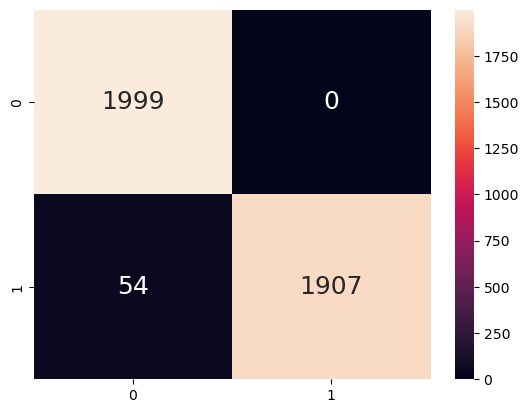

In [14]:
print("KNN Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", classifier.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))

In [15]:
print('KNN TEST F1 Score: {}'.format(f1_score(y_test,y_pred)))

KNN TEST F1 Score: 0.9860392967942089


In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [18]:
gridsearch.best_params_

{'n_neighbors': 36}

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_
{'n_neighbors': 25, 'weights': 'distance'}
test_preds_grid = gridsearch.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.1196820516638153